# The gradient descent algorithm in 1D

<h1><a id='toc'></a>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#0">0. The algorithm 
    </a></li>
    <li><a href="#I1">I Theoretical study
    </a></li>
        <ul>
        <li><a href="#I1">I.1. Existence of a unique minimizer </a></li>
        <li><a href="#I2">I.2. Convergence of the algorithm </a></li>
        </ul>
     <li><a href="#II">II. Numerical implementation </a></li>
     <li><a href="#III">III. Varying step and line search strategy </a></li>
    </ul>
</div>
<br>
<hr>

## 0. The algorithm<a id='0'></a> 

We consider a function $f\in C^1(\mathbf{R},\mathbf{R})$ and we assume that it is strictly convex and that it admits a (unique) minimizer $x^*$. That is, 
$$
f(x^*)\le f(x)\qquad\text{for every }x\in\mathbb{R}.
$$

**Definition:** The gradient descent method with fixed step $\alpha>0$ is defined as follows:

$\bullet$ First choose some initial point $x^0\in\mathbb{R}$,

$\bullet$ Then for $k=0$,... up to convergence: repeat

$$\tag{GD}\begin{array}{rcl}d^{k}&\leftarrow &-f'(x^k)\\
x^{k+1}&\leftarrow&x^k +\alpha d^k.\end{array}$$

**Convergence:** We expect that for a good choice of the step (or learning rate) $\alpha$, the sequence $x^k$ converges towards $x^*$. We will see that this is true under the strong convexity  assumption.

**Stopping criterion:** We need to clarify what we mean by "until convergence". First, let us notice that since $f$ is strictly convex and $C^1$,

$$
f'(x)=0\quad\Longleftrightarrow\quad x=x^*.
$$

Assuming $x^k\to x^*$ as $k\to+\infty$, since $f'$ is continuous, we have $f'(x^k)\to f'(x^*)=0$.
So a stopping criterion could be $$|f'(x^k)|<\tau$$ where $\tau>0$ is a fixed tolerance. However, as we will see in question 5, it is more natural to choose as a stopping criterion
$$
\tag{1} |f'(x^k)|\le\tau |f'(x^0)|.
$$


Another point of view is to remark that if $x^k\to x^*$ then $|x^{k+1}-x^k|\to0$, so another stopping criterion could be

$$
\tag{2} |x^{k+1}-x^k|\le\tau |x^1-x^0|.
$$

## I. Theoretical study assuming $f$ strongly convex <a id='I'></a> 

### 1.1. Existence of a unique minimizer<a id='I1'></a> 

We assume that $f\in C^1(\mathbf{R})$ and there exists some $\delta>0$ such that

$$\tag{3}(f'(x)-f'(y))(x-y)\ge\delta|x-y|^2\quad\forall\,x,y\in\mathbf{R}.$$ 

**Question 1.** Show that $f$ is coercive<br>
(*Hint: using the Taylor formula with integral remainder, show that $$f(x)\ge f(0)+f'(0)x+\delta x^2/2,$$ first for $x>0$, then for $x<0$.*)

**Question 2.** Show that $f$ is strictly convex. 

**Question 3.** Deduce that $f$ admits a unique minimizer $x^*\in\mathbb{R}$.

**Question 4.** We assume now that $f\in C^2(\mathbb{R})$ and that there exists $\delta>0$ such that $f''\ge\delta$. Show that (3) holds true.

### 1.2 Convergence of the algorithm<a id='I2'></a> 

**Question 5.**  Let us consider an affine mapping defined by $A(x)=ax+b$ with $a,b\in\mathbf{R}$, $a\ne0$. Let $\Lambda>0$ and $\gamma\in\mathbf{R}$. We set 
$$F(x):=\Lambda f(A(x))+\gamma.$$
Let $X^k$ be the sequence defined by the gradient descent algorithm for the optimization of $F$ with starting point $X^0:=A(x^0)$ and para-meter $\alpha$. <br>
Show that for every $k\ge0$, $X^k=A(x^k)$.<br>
Show that the stopping criterion (1) is satisfied simultaneously by $(F,X^k)$ and $(f,x^k)$.<br>
Show the same result for the stopping criterion (2).

We still assume that $f\in C^1(\mathbb{R})$ and that (3) holds true for some $\beta>0$. We assume moreover that $f'$ is Lipschitz continuous, that is there exists $L>0$ such that 
$$
\tag{4}
|f'(x)-f'(y)|\le L|x-y|\qquad\forall x,y\in\mathbf{R}
$$

We fix $\alpha,\tau>0$ and $x^0\in\mathbf{R}$ and denote $x^k$ the sequence defined by the gradient descent algorithm (GD).

**Question 6.**  Show that for $k\ge0$,
$$
|x^{k+1}-x^*|^2\le (1-2\alpha\delta + \alpha^2 L^2)|x^k-x^*|^2.
$$
(*Hint: use $f'(x^*)=0$, (3) and (4)*)

Deduce that for $0<\alpha<2\delta/L^2$, the algorithm converges and that the convergence is at least of order one: there exists $\lambda=\lambda(\alpha)\in(0,1)$ such that
$$
|x^k-x^*|\le \lambda^k |x^k-x^0|\qquad\forall\,k\ge0.
$$
The sequence converges at least geometrically.


What is the optimal choice for $\alpha$ ?

## II. Numerical implementation<a id='II'></a> 

We apply the gradient descent method to the minimization on $\mathbf{R}$ of 
$$
f(x):=x^2 + \sin x.
$$

**Question 7.** Show that there exist $\delta,L>0$ such that $f$ satisfies (3) and (4). Give explicit values for $\delta$ and $L$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

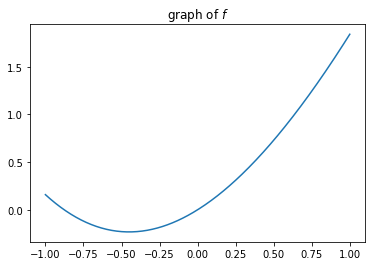

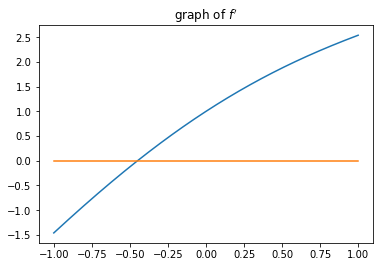

In [2]:
f=lambda x: x**2 + np.sin(x)
df = lambda x: 2*x + np.cos(x)
x=np.linspace(-1,1,300)
plt.plot(x,f(x))
plt.title(r"graph of $f$")
plt.show()
plt.plot(x,df(x))
plt.plot(x,0*x)
plt.title(r"graph of $f'$")
plt.show()

**Question 8.** Implement the algorithm. Choose for $\alpha$ the value computed at the end of question 6. Take $x^0=0$ and use the stopping criterion (1) with $\tau=10^{-11}$.

To avoid infinite loops, we add a stopping criterion $k\le maxiter$ with $maxiter=10^3$.

We will store the values of $x^k$ and $f'(x^k)$ in the lists *list_x*, *list_g*. They are transformed into numpy arrays at the end.

In [ ]:
tau, maxiter=1e-11, 1000
#alpha =?
k=0
x=0
g= df(x)
list_x, list_g= [x], [g]
pass

while True:
    pass
    list_x.append(x); list_g.append(g)
    
list_x=np.array(list_x);list_g=np.array(list_g)

**Question 9.** Represent $|df(x^k)|$ as a function of $k$ in log scale (use *plt.semilogy*).

**Question 10.** Represent $|x^k-x^*|$ as a function of $k$ in log scale. To get a precise approximation of $x^*$, Newton's method is implemented below for solving $f'(x)=0$.

In [ ]:
# Newton method for the computation 
# of a precise approximation of x*
ddf = lambda x:2 - np.sin(x)
x=0
for j in range(5):
    x = x - df(x)/ddf(x)
    print(df(x))
xstar=x

**Question 11.** We now consider $$f(x):=x^2 + 12\sin x.$$

Find numerical approximations of the two local minimizers of $f$.

In [ ]:
f=lambda x: x**2 + 12*np.sin(x)
df = lambda x: 2*x + 12*np.cos(x)
x=np.linspace(-5,8,300)
plt.plot(x,f(x))
plt.title(r"graph of $f$")
plt.show()
plt.plot(x,df(x))
plt.plot(x,0*x)
plt.title(r"graph of $f'$")
plt.show()

## III. Varying step and line search strategy <a id='III'></a> 

The gradient descent algorithm with varying step is defined as follows. Let $x^0\in \mathbb{R}$ (we try to choose $x^0$ close to $x^*$, if no hint, then we take $x^0=0$). Then, for $k=0,1,2,\ldots\ $ up to onvergence, repeat:

$$
\left|\quad
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(x^k),\\ 
x^{k+1}&\longleftarrow &x^k+\alpha_k d^k
\end{array}
\right.
$$

Here the learning rate $\alpha_k>0$ depends on $k$. There are two competing principles that should govern the choice of the learning rate:<br>
$\quad\bullet$ If it is too small, we may approach the minimizer very slowly.<br>
$\quad\bullet$ If it is too large, the sequence $x^k$ may diverge.

To find a convenient learning rate, we propose to use a Line Search method based on Armijo's condition. The general algorithm is the following:<br>
$\quad\bullet$ Pick $x^0\in\mathbf{R}$,<br>
$\quad\bullet$ Then, for $k=0,1,2,\ldots\ $ up to onvergence, repeat:

$$
\left|\quad
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(x^k),\\ 
\alpha_k&\longleftarrow & \text{Line search }\Big(t\mapsto f(x^k+t d^k)\Big)\\
x^{k+1}&\longleftarrow &x^k+\alpha_k d^k
\end{array}
\right.
$$

The second step consists in an approximate optimization of 
$$
f_k(t):= f(x_k+td_k).
$$
The function $f_k$ is strongly convex and $C^1$, because $f$ is. We compute 
$$f_k'(0)=d^kf'(x^k)=-|d^k|^2.$$
From now on, we assume $f'(x^k)=-d^k\ne 0$ otherwise $x^k=x^*$ and the algorithm has already converged. We thus have $f_k'(0)<0$, so the minimizer of $f_k$ is positive. Moreover the Taylor expansion of $f$ at 0 of order 1 reads
$$\tag{5}
f_k(t)=f_k(0) - |d^k|^2 t + o(t),
$$
hence $f_k(t)<f_k(0)$ for $t>0$ small enough.

We now introduce a parameter $\gamma\in(0,1)$. We say that $t$ satisfies the Armijo condition if 
$$
f_k(t)\le f_k(0) - \gamma |d^k|^2 t.\tag{Armijo}
$$
From (5), we have
$$
f_k(t)\le f_k(0) - \gamma |d^k|^2 t -(1-\gamma)|d^k|^2 t + o(t),
$$
and since $(1-\gamma)|d^k|^2>0$, the condition (Armijo) is satisfied for $t>0$ small enough. 

We are now ready to describe the Line Search. We introduce two parameters $\alpha^0>0$ and $\beta\in(0,1)$. The algorithm computing $\alpha_k$ is the following. <br>
$\quad\bullet$ First set $t\longleftarrow\alpha^0$.<br>
$\quad\bullet$ Then, while $t$ does not satisfy (Armijo), set $t\longleftarrow \beta t$.<br>
$\quad\bullet$ Eventually, set $\alpha_k\longleftarrow t$. 


**Question 12.** Take again $f(x)=x^2+\sin x$. Implement the above method with $\gamma=0.5$, $\beta=0.75$ and $\alpha^0=\alpha$ where $\alpha$ is the learning rate you used in the gradient descent algorithm with constant step . 

In [ ]:
f = lambda x: x**2 + np.sin(x)
df = lambda x: 2*x + np.cos(x)

tau, maxiter=1e-11, 100
maxiterLS=10
beta,gamma =.75,.5
#alpha0 = ?
